In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('D:/AI/AI datasets/mnist_train.csv')
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test = pd.read_csv('D:/AI/AI datasets/mnist_test.csv')

test.head()

test = np.array(test)
m1, n1 =test.shape
#np.random.shuffle(test)


test = test[0:m1].T
Y_test = test[0]
X_test = test[1:n1].T

Y_test = Y_test[:,np.newaxis]




In [6]:

X_test=np.reshape(X_test,(10000,28,28))

In [7]:
X1_test = X_test[:,:,:,np.newaxis]
X_test = X_test[:,np.newaxis]

In [8]:
data = np.array(data)
m, n =data.shape
data.shape
np.random.shuffle(data)



data_train = data[0:m].T
Y_train = data_train[0]
X_train = data_train[1:n].T


import keras.api._v2.keras as kr

lr = 0.01
nn = [784, 500,100,20,10]

In [9]:
X_train.shape

(60000, 784)

In [10]:
def array_Y(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() +1))
    one_hot_Y[np.arange(Y.size),Y] = 1
    return one_hot_Y

Y_train=array_Y(Y_train)


In [11]:
X_train=np.reshape(X_train,(60000,28,28))

In [12]:
X_train = X_train[:,:,:,np.newaxis]

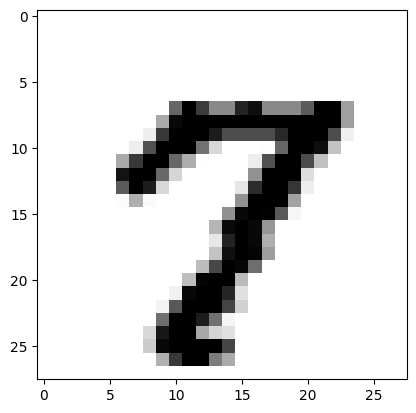

In [13]:
plt.imshow(X_train[504], cmap='gray_r')

In [14]:

model = kr.Sequential()

model.add(kr.layers.Conv2D(32,(3,3),input_shape=(28,28,1) ,activation = 'relu' ) )#input_shape=(28,28)
model.add(kr.layers.MaxPool2D(2,2) )

model.add(kr.layers.Conv2D(64,(3,3) ,activation = 'relu' ) )#input_shape=(28,28)
model.add(kr.layers.MaxPool2D(2,2) )

model.add(kr.layers.Dropout(0.5))

model.add(kr.layers.Flatten())


model.add(kr.layers.Dense(100, activation = 'relu') )


model.add(kr.layers.Dense(10, activation = 'softmax') )

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=kr.optimizers.Adam(learning_rate=0.001),metrics=['acc'])
model.fit(X_train,Y_train, epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 21s 10ms/step - loss: 0.4825 - acc: 0.9068
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1199 - acc: 0.9637
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0913 - acc: 0.9722
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0810 - acc: 0.9761
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0724 - acc: 0.9782


In [16]:
def sort (x):
    max=x[0]
    maxi=0
    for i in range(1,10):
        if x[i]>max:
            max=x[i]
            maxi=i
    return maxi

In [17]:
def pred(x,X_pred=X1_test):
    image = X_pred[x]
    plt.subplot(330 + 1)
    plt.imshow(image,cmap="gray_r")
    plt.show()

    z=model.predict(X_test[x])

    print("Predicita dvs este:", sort(z[0]))

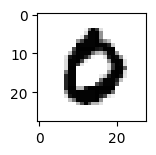

1/1 [==============================] - 0s 29ms/step
Predicita dvs este: 0
[7]


In [21]:
pred(3)

#model.predict(X_test)

print(Y_test[0])

In [25]:
s = np.squeeze(Y_test,axis=1)
s=array_Y(s)
score = model.evaluate(X1_test, s, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04182818531990051
Test accuracy: 0.9858999848365784


In [27]:

model.save('C:/Users/Lenovo/Desktop/AI/my_model.h5')